In [1]:
from sklearn.datasets import load_boston #dataset inside 
from sklearn.model_selection import  train_test_split #test regression
from sklearn.linear_model import LinearRegression 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #linear regression other


In [54]:
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv', index_col = 0)
df['Price'] = df['Price'].fillna(df['Price'].median())

In [55]:
y = np.log(df['Price'])
x = np.log(df.drop({'Address', 'Zip', 'Lon', 'Lat', 'Price'}, axis = 1))

In [56]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [57]:
model.score(x,y) # коэф R2 детерминация

0.6199354797146732

In [77]:
print(pd.DataFrame(model.coef_, index=x.columns, columns=['coef']))
print('Intercept ', model.intercept_)

          coef
Area  0.975044
Room -0.137768
Intercept  8.99159957673324


c:\users\vitor\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Area'>

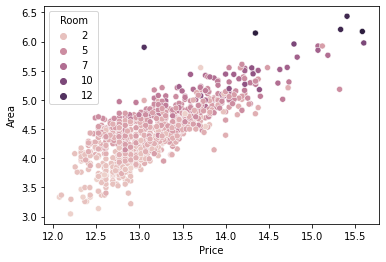

In [90]:
sns.scatterplot(y, x['Area'], hue = df['Room'])

Area      Room
1    4.158883  1.098612
2    4.094345  1.098612
3    4.691348  1.386294
4    4.852030  1.791759
5    4.927254  1.609438
..        ...       ...
920  4.762174  0.000000
921  4.276666  1.098612
922  3.931826  1.098612
923  4.727388  1.386294
924  4.369448  1.386294

[924 rows x 2 columns]

In [91]:
print(df.quantile([0,.25,.50,.75,1]))

          Price    Area  Room       Lon        Lat
0.00   175000.0   21.00   1.0  4.644819  52.291519
0.25   350000.0   60.75   3.0  4.855834  52.352077
0.50   467000.0   83.00   3.0  4.886818  52.364631
0.75   699250.0  113.00   4.0  4.922337  52.377598
1.00  5950000.0  623.00  14.0  5.029122  52.423805


#sample 2. housing price

In [226]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split #test regression
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures

In [1]:
import plotly.express as px

In [5]:
house = pd.read_csv('housingregression.csv')

In [166]:
house.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

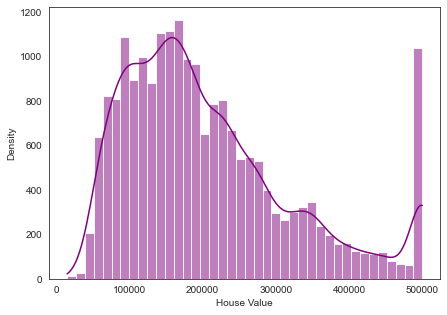

In [82]:
# выбросы
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

# Plot frequency plot/ histogram
axes = sns.histplot(x="median_house_value", kde=True, data=house, ax=axes, bins=40, color = 'purple');
axes = axes.set(xlabel="House Value", ylabel='Density');
# супердорогой дом, возможно какой то очень старый, т.к. такая же тема просматривается на возрасте

В целом не совсем нормальное распределение, т.к. дешевых домов очень мало. Калифорния-дорогой штат

c:\users\vitor\pycharmprojects\pythonproject1\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



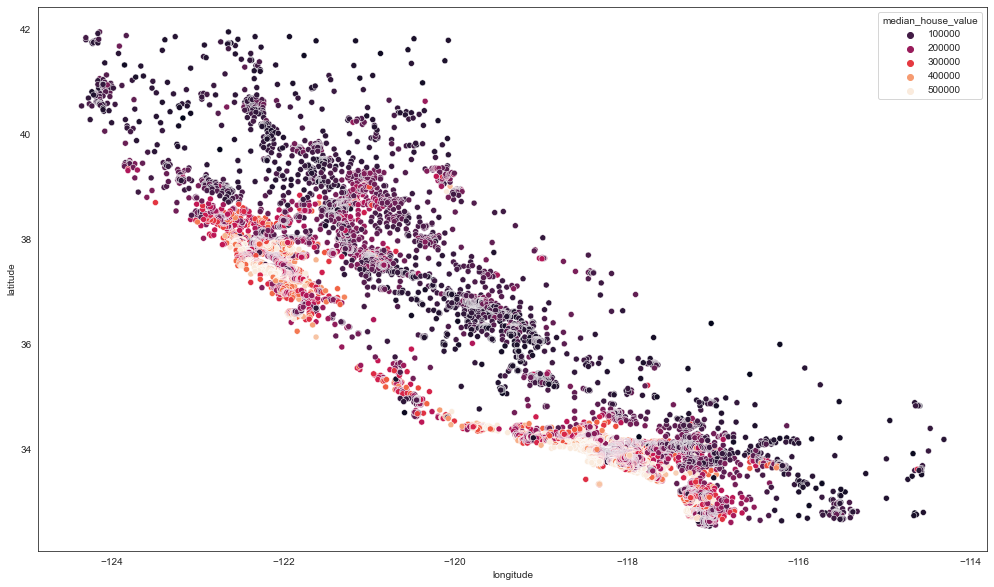

In [77]:
# посмотрим как связанные между собой положение и цена (важный фактор для штата скорее всего это геоположение близость к городам)
plt.figure(figsize=(17,10))
sns.scatterplot(house['longitude'], house['latitude'], hue = house['median_house_value'], palette = 'rocket')
plt.show()

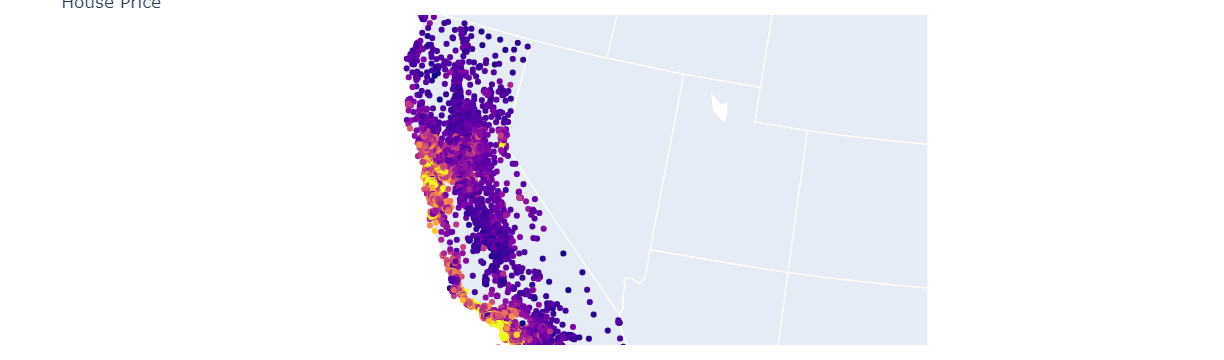

In [27]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        lon = house['longitude'],
        lat = house['latitude'],
        text = house['median_house_value'],
        mode = 'markers',
        marker_color = house['median_house_value'],
        ))

fig.update_layout(title = 'House Price',
        geo_scope='usa',  margin=dict(l=15, r=15, t=15, b=15))
    
fig.show()

Больная часть домов имеет цену выше в близости к океану и рядом с заливом у SF, обычный скаттер плот и на карте

In [37]:
house.groupby('ocean_proximity')['median_house_value'].median() 

ocean_proximity
<1H OCEAN     214850.0
INLAND        108500.0
ISLAND        414700.0
NEAR BAY      233800.0
NEAR OCEAN    229450.0
Name: median_house_value, dtype: float64

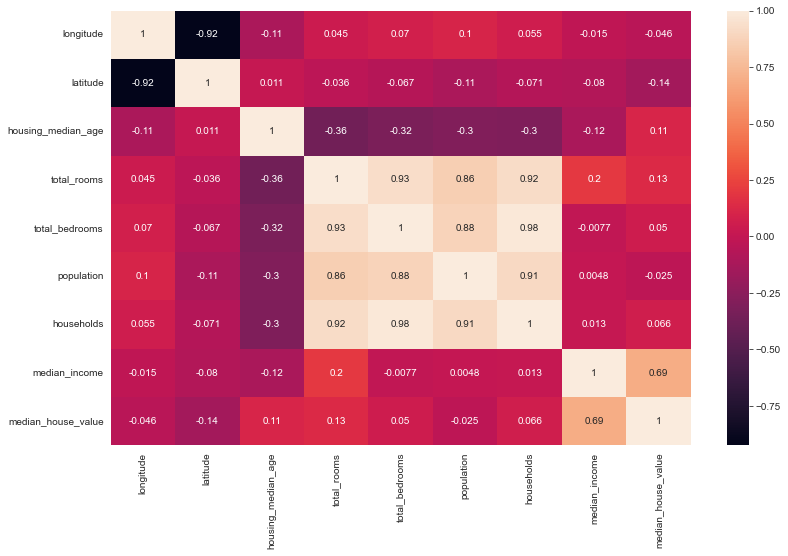

In [76]:
plt.figure(figsize=(13,8))
sns.heatmap(house.corr(), annot = True)
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [87]:
house.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

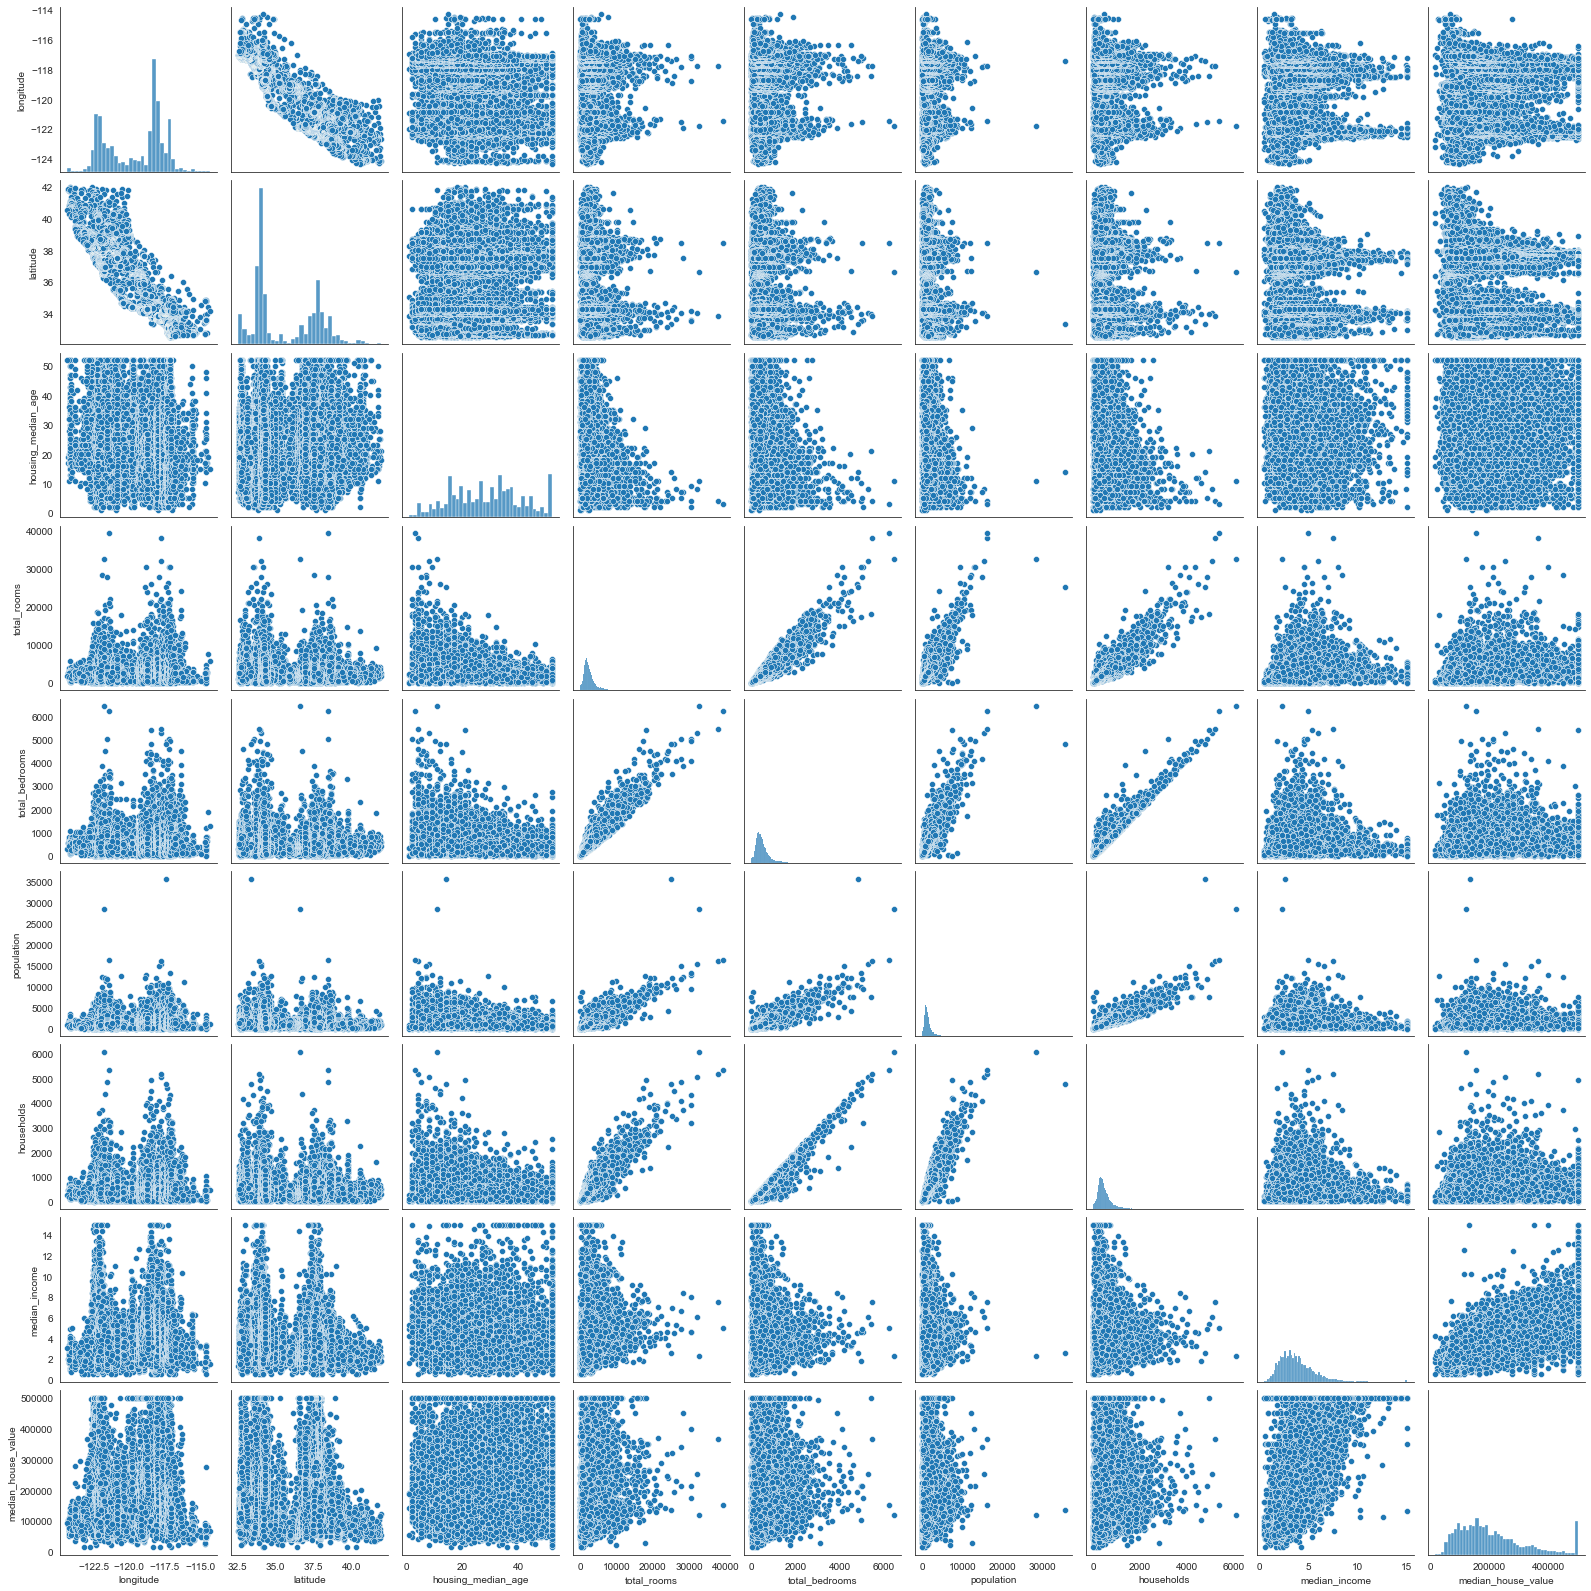

In [81]:
sns.pairplot(house)
plt.show()

Из количественных показателей мало что влияет на цену (median_income only), самым важным показателем является геоположение (долгота и широта) + классификация по положению, стоит убрать возраст дома, и исключить мультиколлинеарность (уберем площадь спален)

In [90]:
house['median_house_value'].skew()

0.9777632739098341

In [116]:
#nan
house.apply(lambda x: sum(x.isnull()), axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Есть пробел по спальным комнатам, но эта переменная коррелирует с хаусхолд и площадью всего дома. Удалим.

In [128]:
prices = house['median_house_value']
features = house.drop({'median_house_value','ocean_proximity', 'total_bedrooms'}, axis=1)

In [297]:
# первая модель регрессии на всех данных

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.15, random_state = 49)

In [248]:
modelreg1 = LinearRegression()
modelreg1.fit(X_train, y_train) #коэф. не описывают поведедение модели корректно


LinearRegression()

In [247]:
pd.DataFrame(data = modelreg1.coef_, index = X_train.columns, columns = ['coef'])

coef
longitude          -42411.226390
latitude           -42509.305595
housing_median_age   1136.357418
total_rooms            -1.793213
population            -40.894427
households            144.275006
median_income       38359.546642

In [137]:
Y_pred = modelreg1.predict(X_test) 
Y_pred2 = modelreg1.predict(X_train)

In [131]:
from sklearn.metrics import r2_score

In [245]:
r2_score(y_train, Y_pred2)

0.6328236062684649

In [246]:
r2_score(y_test, Y_pred) #коэф детерминации, линейная регрессия работает не очень хорошо, т.к. данные цены не зависят линейно от многих предикторов

0.6288122047954487

В целом, явно заметно что использование широты и долготы в таком виде нам не подходит, их нужно заменить или пересчитать

#Представим переменную ocean_proximity как двоичную, и уберем данные по долготе и широте из модели:

In [144]:
house.ocean_proximity.value_counts() # всего у нас 5 типов распoложения

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [146]:
pd.get_dummies(house['ocean_proximity']).head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [265]:
location = pd.get_dummies(house['ocean_proximity'], drop_first = True)

In [266]:

new_house = pd.concat([house, location], axis=1) # объединили два датафрейма. попробуем персчитать регрессию

In [275]:
new_prices = new_house['median_house_value']
new_features = new_house.drop({'longitude', 'latitude','median_house_value','ocean_proximity', 'total_bedrooms', 'total_rooms'}, axis=1)

In [276]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_features, new_prices, test_size = 0.15, random_state = 13)

In [277]:
modelreg2 = LinearRegression()
modelreg2.fit(X_train_new, y_train_new)

LinearRegression()

In [292]:
print(pd.DataFrame(data = modelreg2.coef_, index = X_train_new.columns, columns = ['coef']))
print(f'intercept:         {modelreg2.intercept_}')

                             coef
housing_median_age    1205.291431
population             -40.804176
households             135.459811
median_income        38304.767336
INLAND              -70329.714131
ISLAND              179219.562716
NEAR BAY              2236.206001
NEAR OCEAN           14030.086609
intercept:         34780.71702781264


In [293]:
#результаты интерпретируются получше цена зависит от положения дома напрямую, как и предполагалось вначале

In [294]:
Y_pred2_new = modelreg2.predict(X_train_new)
Y_pred_new = modelreg2.predict(X_test_new) #новые предсказанные значения


In [280]:
#R2:
print('train:', r2_score(y_train_new, Y_pred2_new))
print('test:', r2_score(y_test_new, Y_pred_new))

train: 0.6316447432829234
test: 0.6326736679773302


In [298]:
print("Prediction :\n", np.round(modelreg2.predict(X_test_new[:10]), 2))
print("Actual_result :\n", list(y_test_new[0:10])) #реальные цифры 

Prediction :
 [142504.24 229279.15 119902.39  59059.27 155828.1  284804.38 261189.75
 181346.24 262378.22 204415.96]
Actual_result :
 [130100.0, 229400.0, 82600.0, 53100.0, 107800.0, 268300.0, 277500.0, 142800.0, 223000.0, 193800.0]


In [283]:
from sklearn.metrics import mean_squared_error
final_mae = mean_squared_error(y_test_new, Y_pred_new)
final_rmae = np.sqrt(final_mae)
print( final_rmae)

70435.38172821385


Все еще проблемы с этой моделью, надо решать через деревья.